![title](Chapter-1.png "Header")
___
# Chapter 1 - Simple Approaches to Recommender Systems
## Segment 3 - Making Recommendations Based on Correlation

In [1]:
import numpy as np
import pandas as pd

These datasets are hosted on: https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data

They were originally published by: Blanca Vargas-Govea, Juan Gabriel GonzÃ¡lez-Serna, Rafael Ponce-MedellÃ­n. Effects of relevant contextual features in the performance of a restaurant recommender system. In RecSysâ€™11: Workshop on Context Aware Recommender Systems (CARS-2011), Chicago, IL, USA, October 23, 2011.

In [5]:
frame =  pd.read_csv('rating_final.csv')
cuisine = pd.read_csv('chefmozcuisine.csv')
# geodata = pd.read_csv('geoplaces2.csv', encoding = 'mbcs')
geodata = pd.read_csv('geoplaces2.csv', encoding='latin-1')
# see stackoverflow on the encoding error
# https://stackoverflow.com/questions/30996289/utf8-codec-cant-decode-byte-0xf3

In [6]:
frame.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [7]:
geodata.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [8]:
places =  geodata[['placeID', 'name']]
places.head()

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rincón de San Francisco
3,132667,little pizza Emilio Portes Gil
4,132613,carnitas_mata


In [9]:
cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


## Grouping and Ranking Data

In [10]:
rating = pd.DataFrame(frame.groupby('placeID')['rating'].mean())
rating.head()

,rating
placeID,
132560,0.50
132561,0.75
132564,1.25
132572,1.00
132583,1.00


In [24]:
rating.rating.describe()

count    130.000000
mean       1.179622
std        0.349354
min        0.250000
25%        1.000000
50%        1.181818
75%        1.400000
max        2.000000
Name: rating, dtype: float64

In [11]:
rating['rating_count'] = pd.DataFrame(frame.groupby('placeID')['rating'].count())
rating.head()

,rating,rating_count
placeID,,
132560,0.50,4
132561,0.75,4
132564,1.25,4
132572,1.00,15
132583,1.00,4


In [12]:
rating.describe()

,rating,rating_count
count,130.000000,130.000000
mean,1.179622,8.930769
std,0.349354,6.124279
min,0.250000,3.000000
25%,1.000000,5.000000
50%,1.181818,7.000000
75%,1.400000,11.000000
max,2.000000,36.000000


In [13]:
rating.sort_values('rating_count', ascending=False).head()

,rating,rating_count
placeID,,
135085,1.333333,36
132825,1.281250,32
135032,1.178571,28
135052,1.280000,25
132834,1.000000,25


In [25]:
rating.corr()

,rating,rating_count
rating,1.000000,0.084997
rating_count,0.084997,1.000000


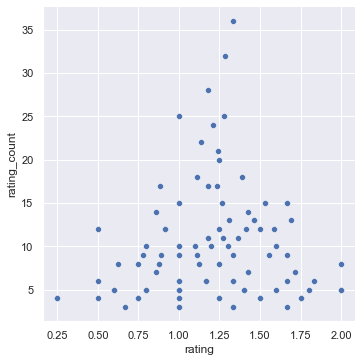

In [28]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.relplot(x="rating", y="rating_count", data=rating)

Rating and count are not highly correlated.

In [14]:
places[places['placeID']==135085]

,placeID,name
121,135085,Tortas Locas Hipocampo


In [15]:
cuisine[cuisine['placeID']==135085]

,placeID,Rcuisine
44,135085,Fast_Food


In [39]:
# top five most popular places
topfiveplaces = rating.sort_values('rating_count', ascending=False).head().index[:5]
print(list(topfiveplaces))

[135085, 132825, 135032, 135052, 132834]


In [40]:
# get names of top five most popular places
places[places['placeID'].isin(list(topfiveplaces))]

,placeID,name
1,132825,puesto de tacos
65,135052,La Cantina Restaurante
80,132834,Gorditas Doa Gloria
119,135032,Cafeteria y Restaurant El Pacifico
121,135085,Tortas Locas Hipocampo


In [41]:
# get cuisines of top five most popular places
cuisine[cuisine['placeID'].isin(list(topfiveplaces))]

,placeID,Rcuisine
44,135085,Fast_Food
65,135052,Bar
66,135052,Bar_Pub_Brewery
81,135032,Cafeteria
82,135032,Contemporary
289,132834,Mexican
294,132825,Mexican


In [43]:
# get count of cuisines per placeID
rating['cuisine_count'] = pd.DataFrame(cuisine.groupby('placeID')['Rcuisine'].count())
rating.head()

,rating,rating_count,cuisine_count
placeID,,,
132560,0.50,4,1.0
132561,0.75,4,NaN
132564,1.25,4,NaN
132572,1.00,15,1.0
132583,1.00,4,1.0


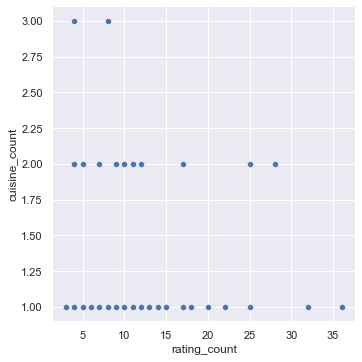

In [45]:
ax = sns.relplot(x="rating_count", y="cuisine_count", data=rating)

## Preparing Data For Analysis

In [16]:
# user-by-places ratings matrix
places_crosstab = pd.pivot_table(data=frame, values='rating', index='userID', columns='placeID')
places_crosstab.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
U1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
Tortas_ratings = places_crosstab[135085]
print(f'Number of non-missing ratings for placeID 135085: {len(Tortas_ratings[Tortas_ratings>=0])}')
Tortas_ratings[Tortas_ratings>=0]

Number of non-missing ratings for placeID 135085: 36


userID
U1001    0.0
U1002    1.0
U1007    1.0
U1013    1.0
U1016    2.0
U1027    1.0
U1029    1.0
U1032    1.0
U1033    2.0
U1036    2.0
U1045    2.0
U1046    1.0
U1049    0.0
U1056    2.0
U1059    2.0
U1062    0.0
U1077    2.0
U1081    1.0
U1084    2.0
U1086    2.0
U1089    1.0
U1090    2.0
U1092    0.0
U1098    1.0
U1104    2.0
U1106    2.0
U1108    1.0
U1109    2.0
U1113    1.0
U1116    2.0
U1120    0.0
U1122    2.0
U1132    2.0
U1134    2.0
U1135    0.0
U1137    2.0
Name: 135085, dtype: float64

## Evaluating Similarity Based on Correlation

In [62]:
similar_to_Tortas = places_crosstab.corrwith(Tortas_ratings, axis=0)

corr_Tortas = pd.DataFrame(similar_to_Tortas, columns=['PearsonR'])
corr_Tortas.dropna(inplace=True) # drops missing values
corr_Tortas.sort_values(by='PearsonR',ascending=False).head(10)

/Users/daniel.alvarez/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/daniel.alvarez/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,PearsonR
placeID,
135076,1.000000
132922,1.000000
135085,1.000000
132937,1.000000
132925,1.000000
135066,1.000000
135053,1.000000
132754,0.930261
135045,0.912871


In [60]:
# join with rating dataframe to understand popularity of each places
Tortas_corr_summary = corr_Tortas.join(rating['rating_count'])

In [63]:
# retrieve records with at least 10 ratings counts
Tortas_corr_summary[Tortas_corr_summary['rating_count']>=10].sort_values('PearsonR', ascending=False).head(10)

,PearsonR,rating_count
placeID,,
135076,1.000000,13
135085,1.000000,36
135066,1.000000,12
132754,0.930261,13
135045,0.912871,13
135062,0.898933,21
135028,0.892218,15
135042,0.881409,20
135046,0.867722,11


In [21]:
places_corr_Tortas = pd.DataFrame([135085, 132754, 135045, 135062, 135028, 135042, 135046], index = np.arange(7), columns=['placeID'])

# join places correlated with Tortas and cuisine to get cuisines of places associated with highly correlated places with place ID 135085
summary = pd.merge(places_corr_Tortas, cuisine,on='placeID')
summary

,placeID,Rcuisine
0,135085,Fast_Food
1,132754,Mexican
2,135028,Mexican
3,135042,Chinese
4,135046,Fast_Food


In [22]:
places[places['placeID']==135046]

,placeID,name
42,135046,Restaurante El Reyecito


In [23]:
cuisine['Rcuisine'].describe()

count         916
unique         59
top       Mexican
freq          239
Name: Rcuisine, dtype: object

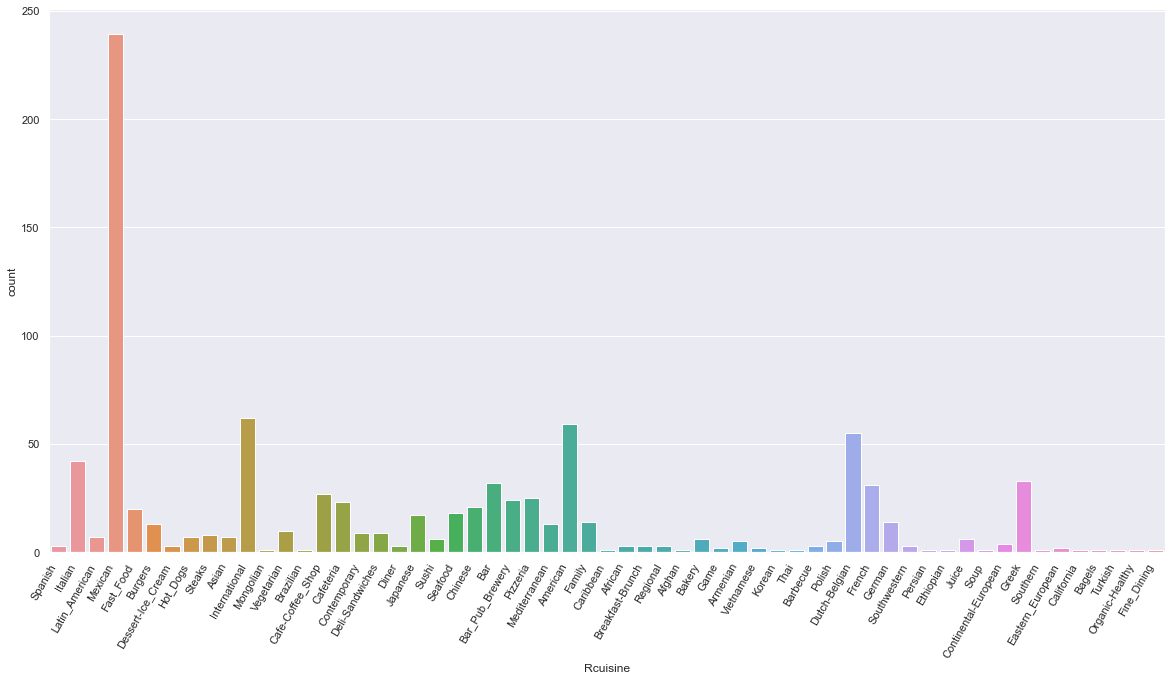

In [75]:
# countplot of cuisines
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(20,10))
ax = sns.countplot(x="Rcuisine", data=cuisine)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
None #don't show the label objects